In [2]:
import cv2
import numpy as np

# Load the stereo images
left_img = cv2.imread('im1.jpeg', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('im2.jpeg', cv2.IMREAD_GRAYSCALE)

# Define the number of inner corners of the chessboard (for example, an 8x8 chessboard has 7x7 inner corners)
pattern_size = (7, 7)

# Find the chessboard corners in both images
ret_left, corners_left = cv2.findChessboardCorners(left_img, pattern_size)
ret_right, corners_right = cv2.findChessboardCorners(right_img, pattern_size)

if ret_left and ret_right:
    # Refine the detected corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    cv2.cornerSubPix(left_img, corners_left, (11, 11), (-1, -1), criteria)
    cv2.cornerSubPix(right_img, corners_right, (11, 11), (-1, -1), criteria)

    # These are your 2D points in each image
    points_2d_left = corners_left
    points_2d_right = corners_right
else:
    print("Could not find chessboard corners in one or both images.")


Could not find chessboard corners in one or both images.


In [3]:
left_img = cv2.imread('im1.jpeg', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('im2.jpeg', cv2.IMREAD_GRAYSCALE)

In [4]:
cv2.findChessboardCorners(left_img, (7,5))

(False, None)

In [ ]:
import cv2
import numpy as np

# 1. Load Images
img1 = cv2.imread("first_image.jpg")
img2 = cv2.imread("second_image.jpg")

# 2. Given 3D points and corresponding 2D points
# Replace with your data
object_points_left = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
])

object_points_right = np.array([
    [24.3, 0, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
])

# 3. Get 2D points (e.g., clicked on the images or detected automatically)
# For demonstration, let's assume they are:
image_points_left = np.array([
    # Example points, replace with detected coordinates
    [100, 100],
    [200, 100],
    [200, 200],
    [100, 200],
    [100, 50],
    [200, 50],
    [200, 250],
    [100, 250]
])

image_points_right = image_points_left + 5  # Just for demo, consider it's shifted by 5 pixels

# 4. Camera Calibration
_, camera_matrix_left, dist_coeff_left, _, _ = cv2.calibrateCamera([object_points], [image_points_left], img1.shape[:2], None, None)
_, camera_matrix_right, dist_coeff_right, _, _ = cv2.calibrateCamera([object_points], [image_points_right], img2.shape[:2], None, None)

# 5. Calculate Fundamental Matrix
F, _ = cv2.findFundamentalMat(image_points_left, image_points_right, cv2.FM_LMEDS)

# 6. Triangulation to get 3D coordinates
def triangulate_points(p1, p2, m1, m2):
    return cv2.triangulatePoints(m1, m2, p1.T, p2.T).T

# 7. Mouse Callback Function
def callback(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        p1 = np.array([x, y, 1]).reshape(3, 1)
        
        # Draw a + sign at p
        cv2.drawMarker(img1, (x, y), (0, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=10)
        
        # Compute epipolar line on right image
        l2 = np.dot(F, p1)
        x0, y0 = map(int, [0, -l2[2]/l2[1]])
        x1, y1 = map(int, [img2.shape[1], -(l2[2] + l2[0]*img2.shape[1]) / l2[1]])
        
        # Draw the line on the right image
        cv2.line(img2, (x0, y0), (x1, y1), (0, 255, 0), 1)
        
        # This is a naive way to find a corresponding point. In real-world applications, you'd use better matching techniques.
        p2 = np.array([x+5, y, 1]).reshape(3, 1)  # Assuming the shift is 5 pixels for demonstration
        
        # Draw a + sign at p'
        cv2.drawMarker(img2, (x+5, y), (0, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=10)
        
        # Get 3D coordinates
        point_3d_homo = triangulate_points(p1.T, p2.T, camera_matrix_left, camera_matrix_right)
        point_3d = (point_3d_homo / point_3d_homo[3])[:3].ravel()
        
        print(f"3D Point: {point_3d}")
        
        cv2.imshow('Left Image', img1)
        cv2.imshow('Right Image', img2)

# Create window and bind function to window
cv2.namedWindow('Left Image')
cv2.setMouseCallback('Left Image', callback)

cv2.imshow('Left Image', img1)
cv2.imshow('Right Image', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import cv2

# Global variables
point_list = []
point_count = 0

# Mouse callback function
def select_points(event, x, y, flags, param):
    global point_list, point_count
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(temp_img, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow('Image', temp_img)
        point_list.append((x, y))
        point_count += 1

        if point_count == 18:
            cv2.destroyAllWindows()

# Read your image
img_left = cv2.imread('im1.jpeg')
img_right = cv2.imread('im2.jpeg')

# For left image
temp_img = img_left.copy()
cv2.imshow('Image', temp_img)
cv2.setMouseCallback('Image', select_points)
cv2.waitKey(0)

points_2d_left = point_list.copy()  # save the points for the left image
point_list.clear()  # clear the list to store points for the right image
point_count = 0  # reset point count

# For right image
temp_img = img_right.copy()
cv2.imshow('Image', temp_img)
cv2.setMouseCallback('Image', select_points)
cv2.waitKey(0)

points_2d_right = point_list

print("Points in left image:", points_2d_left)
print("Points in right image:", points_2d_right)


Points in left image: [(253, 378), (85, 351), (92, 200), (260, 192), (407, 356), (294, 378), (301, 196), (413, 220)]
Points in right image: [(257, 404), (106, 365), (113, 197), (269, 177), (475, 376), (312, 402), (321, 184), (480, 214)]


In [10]:
import cv2
import numpy as np

# Given data
world_points_left = np.array([
    [  0.        ,  14.46666667,   3.8       ],
       [  0.        , 217.        ,   3.8       ],
       [  0.        , 217.        ,  18.8       ],
       [  0.        ,  14.46666667,  18.8       ],
], dtype=np.float32)

world_points_right = np.array([
 [394.        ,   0.        ,   3.8       ],
       [ 53.50617284,   0.        ,   3.8       ],
       [ 53.50617284,   0.        ,  18.8       ],
       [394.        ,   0.        ,  18.8       ],
], dtype=np.float32)

# Image dimensions
width = 1280
height = 720

# Approximate intrinsic matrix
fx = width
fy = height
cx = width / 2
cy = height / 2
intrinsic_matrix = np.array([[fx, 0, cx],
                             [0, fy, cy],
                             [0, 0, 1]], dtype=np.float32)


points_2d_left = np.array([(251, 379), (84, 352), (91, 201), (259, 190)], dtype=np.float32)
points_2d_right = np.array([(475, 373), (312, 402), (323, 185), (478, 214)], dtype=np.float32)

# Camera Calibration
ret, mtx_left, dist_left, rvecs_left, tvecs_left = cv2.calibrateCamera([world_points_left], [points_2d_left], (1280, 720), intrinsic_matrix, None)
ret, mtx_right, dist_right, rvecs_right, tvecs_right = cv2.calibrateCamera([world_points_right], [points_2d_right], (1280, 720), intrinsic_matrix, None)

# Calculate Fundamental Matrix
F, _ = cv2.findFundamentalMat(points_2d_left, points_2d_right, cv2.FM_8POINT)

print("Fundamental Matrix F:\n", F)

# Callback function for mouse click on the left image
def on_click_left(event, x, y, flags, param):
    global points_2d_left, points_2d_right, mtx_left, mtx_right, F

    if event == cv2.EVENT_LBUTTONDOWN:
        pt = np.array([x, y, 1]).reshape(3, 1)
        epiline = np.dot(F, pt).ravel()

        # Draw the epipolar line on the right image
        cv2.line(right_img, (0, int(-epiline[2] / epiline[1])), (right_img.shape[1], int(-(epiline[2] + epiline[0] * right_img.shape[1]) / epiline[1])), (0, 0, 255), 1)

        # Draw "+" on the left image
        cv2.drawMarker(left_img, (x, y), (0, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=10, thickness=2)

        # Show the images again
        cv2.imshow('Left Image', left_img)
        cv2.imshow('Right Image', right_img)

# Callback function for mouse click on the right image
def on_click_right(event, x, y, flags, param):
    global points_2d_left, points_2d_right, mtx_left, mtx_right, F

    if event == cv2.EVENT_LBUTTONDOWN:
        pt = np.array([x, y, 1]).reshape(3, 1)
        epiline = np.dot(F.T, pt).ravel()

        # Draw the epipolar line on the left image
        cv2.line(left_img, (0, int(-epiline[2] / epiline[1])), (left_img.shape[1], int(-(epiline[2] + epiline[0] * left_img.shape[1]) / epiline[1])), (0, 0, 255), 1)

        # Draw "+" on the right image
        cv2.drawMarker(right_img, (x, y), (0, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=10, thickness=2)

        # Show the images again
        cv2.imshow('Left Image', left_img)
        cv2.imshow('Right Image', right_img)

# Load your stereo images
left_img = cv2.imread('im1.jpeg')
right_img = cv2.imread('im2.jpeg')

cv2.namedWindow('Left Image')
cv2.setMouseCallback('Left Image', on_click_left)
cv2.namedWindow('Right Image')
cv2.setMouseCallback('Right Image', on_click_right)

cv2.imshow('Left Image', left_img)
cv2.imshow('Right Image', right_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/calib3d/src/calibration.cpp:1576: error: (-5:Bad argument) For non-planar calibration rigs the initial intrinsic matrix must be specified in function 'cvCalibrateCamera2Internal'


In [3]:
import numpy as np

# Define your 3D and 2D points
points_3d = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
    [24.3, 0, 3.8],
    [3.3, 0, 3.8],
    [3.3, 0, 18.8],
    [24.3, 0, 18.8]
])

points_2d_left = np.array([(251, 379), (84, 352), (91, 201), (259, 190)])
points_2d_right = np.array([(475, 373), (312, 402), (323, 185), (478, 214)])
points_2d = np.vstack((points_2d_left, points_2d_right))

# Compute 3D range
range_3d = np.max(points_3d, axis=0) - np.min(points_3d, axis=0)

# Compute 2D range
range_2d = np.max(points_2d, axis=0) - np.min(points_2d, axis=0)

# Compute scaling factors
scale_factors = range_2d / range_3d[:2]

# Scale the 3D points
points_3d_scaled = points_3d.copy()
points_3d_scaled[:, 0] *= scale_factors[0]
points_3d_scaled[:, 1] *= scale_factors[1]

print("Original 3D points:")
print(points_3d)
print("\nScaled 3D points:")
print(points_3d_scaled)


Original 3D points:
[[ 0.   1.5  3.8]
 [ 0.  22.5  3.8]
 [ 0.  22.5 18.8]
 [ 0.   1.5 18.8]
 [24.3  0.   3.8]
 [ 3.3  0.   3.8]
 [ 3.3  0.  18.8]
 [24.3  0.  18.8]]

Scaled 3D points:
[[  0.          14.46666667   3.8       ]
 [  0.         217.           3.8       ]
 [  0.         217.          18.8       ]
 [  0.          14.46666667  18.8       ]
 [394.           0.           3.8       ]
 [ 53.50617284   0.           3.8       ]
 [ 53.50617284   0.          18.8       ]
 [394.           0.          18.8       ]]


In [4]:
points_3d_scaled

array([[  0.        ,  14.46666667,   3.8       ],
       [  0.        , 217.        ,   3.8       ],
       [  0.        , 217.        ,  18.8       ],
       [  0.        ,  14.46666667,  18.8       ],
       [394.        ,   0.        ,   3.8       ],
       [ 53.50617284,   0.        ,   3.8       ],
       [ 53.50617284,   0.        ,  18.8       ],
       [394.        ,   0.        ,  18.8       ]])

In [14]:

import numpy as np
import cv2

# Image dimensions
width = 1280
height = 720

# Initialize intrinsic matrix
fx = width
fy = height
cx = width / 2
cy = height / 2
intrinsic_matrix = np.array([[fx, 0, cx],
                             [0, fy, cy],
                             [0, 0, 1]], dtype=np.float32)

# Initial distortion coefficients
dist_coeff = np.zeros((5,1), dtype=np.float32)

# Your 3D and 2D points
scaled_3d_points = np.array([
    [0, 14.46666667, 3.8],
    [0, 217, 3.8],
    [0, 217, 18.8],
    [0, 14.46666667, 18.8],
    [394, 0, 3.8],
    [53.50617284, 0, 3.8],
    [53.50617284, 0, 18.8],
    [394, 0, 18.8]
], dtype=np.float32)

points_2d_left = np.array([(251, 379), (84, 352), (91, 201), (259, 190)], dtype=np.float32)
points_2d_right = np.array([(475, 373), (312, 402), (323, 185), (478, 214)], dtype=np.float32)

# Camera Calibration
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC
ret, mtx_left, dist_left, rvecs_left, tvecs_left = cv2.calibrateCamera([scaled_3d_points[:4]], [points_2d_left], (width, height), intrinsic_matrix, dist_coeff, flags=flags)
ret, mtx_right, dist_right, rvecs_right, tvecs_right = cv2.calibrateCamera([scaled_3d_points[4:]], [points_2d_right], (width, height), intrinsic_matrix, dist_coeff, flags=flags)

print("Left Camera Matrix:", mtx_left)
print("Right Camera Matrix:", mtx_right)

error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/calib3d/src/calibration.cpp:1576: error: (-5:Bad argument) For non-planar calibration rigs the initial intrinsic matrix must be specified in function 'cvCalibrateCamera2Internal'


In [22]:
import cv2
import numpy as np

# Reading the Images
left_img = cv2.imread("im1.jpeg")
right_img = cv2.imread("im2.jpeg")

# Known 3D world points and 2D image points
world_points = np.array([
    [0, 1.5, 0],
    [0, 22.5, 0],
    [0, 22.5, 0],
    [0, 1.5, 0],
    [24.3, 0, 0],
    [3.3, 0, 0],
    [3.3, 0, 0],
    [24.3, 0, 0]
], dtype=np.float32)

points_2d_left = np.array([
    [251, 379], 
    [84, 352], 
    [91, 201], 
    [259, 190]
], dtype=np.float32)

points_2d_right = np.array([
    [475, 373],
    [312, 402], 
    [323, 185], 
    [478, 214]
], dtype=np.float32)

# Camera calibration
# Define image size
image_size = (left_img.shape[1], left_img.shape[0])  # (width, height)

# Initial camera matrix - assuming roughly central principal point and aspect ratio = 1
initial_camera_matrix = np.array([[1000, 0, image_size[0]/2], [0, 1000, image_size[1]/2], [0, 0, 1]])
ret, mtx_left, dist_left, rvecs_left, tvecs_left = cv2.calibrateCamera([world_points[:4]], [points_2d_left], image_size, None, None)
ret, mtx_right, dist_right, rvecs_right, tvecs_right = cv2.calibrateCamera([world_points[4:]], [points_2d_right], image_size, None, None)


# Compute the fundamental matrix
F, _ = cv2.findFundamentalMat(points_2d_left, points_2d_right, cv2.FM_LMEDS)

def mouse_event_handler(event, x, y, flags, param):
    global left_img, right_img
    
    if event == cv2.EVENT_LBUTTONDOWN:
        if param == "left":
            cv2.circle(left_img, (x,y), 5, (0,0,255), -1)
            
            # Calculate epipolar line on the right image
            line = cv2.computeCorrespondEpilines(np.array([[x, y]]).reshape(-1,1,2), 1, F)
            line = line.squeeze()
            start = (0, int(-line[2]/line[1]))
            end = (right_img.shape[1], int((-line[2]-line[0]*right_img.shape[1])/line[1]))
            
            cv2.line(right_img, start, end, (0,255,0), 1)
            
            # Triangulation to compute 3D coordinates
            P1 = np.hstack((mtx_left, np.array([[0], [0], [0]])))
            P2 = np.hstack((mtx_right, np.array([[0], [0], [0]])))

            point_4d_hom = cv2.triangulatePoints(P1, P2, np.array([[x], [y]]), np.array([[x], [y]]))  # You may need to adjust the corresponding point in the right image
            point_3d = point_4d_hom / point_4d_hom[3]
            print("3D Point:", point_3d[:3])

        elif param == "right":
            # Similar steps for the right image...
            cv2.circle(right_img, (x,y), 5, (0,0,255), -1)
            
            # Calculate epipolar line on the right image
            line = cv2.computeCorrespondEpilines(np.array([[x, y]]).reshape(-1,1,2), 1, F)
            line = line.squeeze()
            start = (0, int(-line[2]/line[1]))
            end = (right_img.shape[1], int((-line[2]-line[0]*right_img.shape[1])/line[1]))
            
            cv2.line(right_img, start, end, (0,255,0), 1)
            
            # Triangulation to compute 3D coordinates
            P1 = np.hstack((mtx_left, np.array([[0], [0], [0]])))
            P2 = np.hstack((mtx_right, np.array([[0], [0], [0]])))

            point_4d_hom = cv2.triangulatePoints(P1, P2, np.array([[x], [y]]), np.array([[x], [y]]))  # You may need to adjust the corresponding point in the right image
            point_3d = point_4d_hom / point_4d_hom[3]
            print("3D Point:", point_3d[:3])
            pass

        cv2.imshow("Left Image", left_img)
        cv2.imshow("Right Image", right_img)

cv2.namedWindow("Left Image")
cv2.namedWindow("Right Image")

cv2.setMouseCallback("Left Image", mouse_event_handler, "left")
cv2.setMouseCallback("Right Image", mouse_event_handler, "right")

cv2.imshow("Left Image", left_img)
cv2.imshow("Right Image", right_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/calib3d/src/calibration.cpp:1173: error: (-2:Unspecified error) in function 'void cvFindExtrinsicCameraParams2(const CvMat *, const CvMat *, const CvMat *, const CvMat *, CvMat *, CvMat *, int)'
> DLT algorithm needs at least 6 points for pose estimation from 3D-2D point correspondences. (expected: 'count >= 6'), where
>     'count' is 4
> must be greater than or equal to
>     '6' is 6


In [23]:
import cv2
import numpy as np

# Load the left and right images in grayscale
imgL = cv2.imread('im1.jpeg', 0)
imgR = cv2.imread('im2.jpeg', 0)

# Use StereoSGBM to calculate disparity
window_size = 5
min_disp = 32
num_disp = 112-min_disp
stereo = cv2.StereoSGBM_create(minDisparity = min_disp,
    numDisparities = num_disp,
    blockSize = 16,
    P1 = 8*3*window_size**2,
    P2 = 32*3*window_size**2,
    disp12MaxDiff = 1,
    uniquenessRatio = 10,
    speckleWindowSize = 100,
    speckleRange = 32
)

In [24]:
disparity = stereo.compute(imgL,imgR).astype(np.float32) / 16.0


In [25]:
disparity

array([[31., 31., 31., ..., 31., 31., 31.],
       [31., 31., 31., ..., 31., 31., 31.],
       [31., 31., 31., ..., 31., 31., 31.],
       ...,
       [31., 31., 31., ..., 31., 31., 31.],
       [31., 31., 31., ..., 31., 31., 31.],
       [31., 31., 31., ..., 31., 31., 31.]], dtype=float32)

In [31]:
h, w = imgL.shape[:2]
f = 0.8 * w  # guess for focal length
Q = np.float32([[1, 0, 0, -0.5 * w],
                    [0, -1, 0, 0.5 * h],  # turn points 180 deg around x-axis,
                    [0, 0, 0, -f],  # so that y-axis looks up
                    [0, 0, 1, 0]])

In [32]:
points = cv2.reprojectImageTo3D(disparity, Q)

In [33]:
points

array([[[-10.32258  ,   7.7419353, -16.516129 ],
        [-10.290322 ,   7.7419353, -16.516129 ],
        [-10.258064 ,   7.7419353, -16.516129 ],
        ...,
        [ 10.225806 ,   7.7419353, -16.516129 ],
        [ 10.258064 ,   7.7419353, -16.516129 ],
        [ 10.290322 ,   7.7419353, -16.516129 ]],

       [[-10.32258  ,   7.709677 , -16.516129 ],
        [-10.290322 ,   7.709677 , -16.516129 ],
        [-10.258064 ,   7.709677 , -16.516129 ],
        ...,
        [ 10.225806 ,   7.709677 , -16.516129 ],
        [ 10.258064 ,   7.709677 , -16.516129 ],
        [ 10.290322 ,   7.709677 , -16.516129 ]],

       [[-10.32258  ,   7.677419 , -16.516129 ],
        [-10.290322 ,   7.677419 , -16.516129 ],
        [-10.258064 ,   7.677419 , -16.516129 ],
        ...,
        [ 10.225806 ,   7.677419 , -16.516129 ],
        [ 10.258064 ,   7.677419 , -16.516129 ],
        [ 10.290322 ,   7.677419 , -16.516129 ]],

       ...,

       [[-10.32258  ,  -7.645161 , -16.516129 ],
        [-1

: 

In [30]:
left_img
cv2.findChessboardCorners(left_img, (8,7))

(False, None)

In [29]:
left_img

array([[[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 52,  52,  52],
        [ 42,  42,  42],
        [ 62,  62,  62]],

       [[104, 104, 104],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 52,  52,  52],
        [ 42,  42,  42],
        [ 65,  65,  65]],

       [[102, 102, 102],
        [101, 101, 101],
        [104, 104, 104],
        ...,
        [ 52,  52,  52],
        [ 41,  41,  41],
        [ 67,  67,  67]],

       ...,

       [[ 43,  43,  43],
        [ 45,  45,  45],
        [ 46,  46,  46],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       [[ 45,  45,  45],
        [ 45,  45,  45],
        [ 51,  51,  51],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       [[ 46,  46,  46],
        [ 48,  48,  48],
        [ 55,  55,  55],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 29,  29,  29]]

In [2]:
import cv2
left = cv2.imread('im1.jpeg')

In [14]:
gray = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
cv2.findChessboardCornersSBWithMeta(gray, (6,4), None)

(False, None, None)

In [5]:
import numpy as np
import cv2

# Define 3D world coordinates of 4 known points
world_points = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
    [24.3, 0, 3.8],
    [3.3, 0, 3.8],
    [3.3, 0, 18.8],
    [24.3, 0, 18.8]
], dtype=np.float32).reshape(1, -1, 3)

# Define corresponding 2D image points
#407 356 
points_2d_left = np.array([
    (251, 379),
    (84, 352),
    (91, 201),
    (259, 190),
    (407, 356),
    (294, 379),
    (300, 195),
    (411, 219),
], dtype=np.float32).reshape(1, -1, 2)

# Calibrate the camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(world_points, points_2d_left, (1280, 720), None, None)

# Print the camera matrix
print("Camera Matrix:")
print(mtx)

error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/calib3d/src/calibration.cpp:1576: error: (-5:Bad argument) For non-planar calibration rigs the initial intrinsic matrix must be specified in function 'cvCalibrateCamera2Internal'


In [1]:
import math
import cv2
import numpy as np


with open('im1_points.txt', 'r') as f:
    points1 = f.readlines()

with open('im2_points.txt', 'r') as f:
    points2 = f.readlines()

with open('3DCoordinates.txt', 'r') as f:
    points_3d = f.readlines()

points1 = [point.split() for point in points1]  # 2D image points
points2 = [point.split() for point in points2]  # 2D image points
points_3d = [point.split() for point in points_3d]  # 3D world points
im1 = cv2.imread('im1.jpeg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('im2.jpeg', cv2.IMREAD_GRAYSCALE)


def camera_calibration(image_points, world_points):
    A = np.zeros((len(image_points) * 2, 12))
    for i, (image, object) in enumerate(zip(image_points, world_points)):
        X, Y, Z = [float(point) for point in object]
        x, y = [float(point) for point in image]
        A[2 * i, :] = [-X, -Y, -Z, -1, 0, 0, 0, 0, x * X, x * Y, x * Z, x]
        A[2 * i + 1, :] = [0, 0, 0, 0, -X, -Y, -Z, -1, y * X, y * Y, y * Z, y]
    # Perform SVD decomposition
    _, _, V = np.linalg.svd(A)
    P = V[-1].reshape((3, 4))

    # Extract camera parameters from V
    camera_params = V[-1, :12]
    camera_params /= camera_params[-1]  # Normalize the parameters

    print(f'Camera parameters: \n {camera_params}')
    # Compute the calibration error
    projection_error = 0.0
    for i, (image, object) in enumerate(zip(image_points, world_points)):
        X = [float(point) for point in object]
        X.append(1)
        x = [float(point) for point in image]
        x.append(1)

        projected_x = np.dot(camera_params.reshape((3, 4)), X)
        projected_x /= projected_x[-1]  # Normalizing
        projection_error += np.linalg.norm(projected_x[:-1] - x[:-1])

    mean_error = projection_error / len(image_points)
    print("Mean reprojection error: {}".format(mean_error))

    return camera_params


def calculate_fundamental_matrix(img1, img2):
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    # Initialize Brute-Force Matcher
    bf = cv2.BFMatcher()

    # Match descriptors
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to keep good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Extract corresponding keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Compute fundamental matrix using RANSAC
    fundamental_matrix, mask = cv2.findFundamentalMat(src_pts, dst_pts, cv2.FM_RANSAC)

    print(fundamental_matrix)
    return fundamental_matrix


def calculate_zncc(img1, img2, point1, point2, window_size):
    """
    Calculate Zero Mean Normalized Cross-Correlation (ZNCC) between two pixel points.

    Args:
        img1 (numpy.ndarray): The first image.
        img2 (numpy.ndarray): The second image.
        point1 (tuple): Coordinates (row, col) of the first point in img1.
        point2 (tuple): Coordinates (row, col) of the corresponding point in img2.
        window_size (int): Size of the window around the points for ZNCC calculation.

    Returns:
        zncc_score (float): ZNCC score between the patches centered at the two points.
    """
    half_window = window_size // 2

    # Extract patches around the points
    patch1 = img1[point1[0] - half_window:point1[0] + half_window + 1,
             point1[1] - half_window:point1[1] + half_window + 1]

    patch2 = img2[point2[0] - half_window:point2[0] + half_window + 1,
             point2[1] - half_window:point2[1] + half_window + 1]

    # Calculate means of the patches
    mean1 = np.mean(patch1)
    mean2 = np.mean(patch2)

    # Calculate zero-mean patches
    zero_mean_patch1 = patch1 - mean1
    zero_mean_patch2 = patch2 - mean2

    # Calculate the cross-correlation
    cross_corr = np.sum(zero_mean_patch1 * zero_mean_patch2)

    # Calculate the standard deviations
    std_dev1 = np.sqrt(np.sum(zero_mean_patch1 ** 2))
    std_dev2 = np.sqrt(np.sum(zero_mean_patch2 ** 2))

    # Calculate ZNCC
    zncc_score = cross_corr / (std_dev1 * std_dev2)

    return zncc_score


def drawEpipolarLine(u, v, F, img1, img2):

    p = np.array([[u, v, 1]], dtype=np.float32)

    sift = cv2.SIFT_create()

    # Detect keypoints
    keypoints1, desc1 = sift.detectAndCompute(img1, None)
    keypoints2, desc2 = sift.detectAndCompute(img2, None)

    # Create a Brute-Force Matcher
    bf = cv2.BFMatcher()
    # Match descriptors from both images
    matches = bf.knnMatch(desc1, desc2, k=2)
    # Apply ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.3 * n.distance:
            good_matches.append(m)

    src_pts = np.float32([keypoints1[match.queryIdx].pt for match in good_matches])
    dst_pts = np.float32([keypoints2[match.trainIdx].pt for match in good_matches])

    distance_from_keypoints = list()
    for i, pt in enumerate(src_pts):
        distance_from_keypoints.append((math.sqrt((pt[0] - u)**2 + (pt[1] - v)**2), pt, dst_pts[i]))
    distance_from_keypoints.sort(key=lambda x: x[0])
    distance_from_keypoints = distance_from_keypoints[0]

    disparity = distance_from_keypoints[1][0] - distance_from_keypoints[2][0]

    line = cv2.computeCorrespondEpilines(p, 1, F)
    epipolar_line = line.reshape(-1, 3)
    # Calculate epipolar line parameters
    epipolar_line = epipolar_line.flatten()
    a, b, c = epipolar_line

    # Calculate the range of x coordinates for drawing the line
    img1_height, img1_width = img1.shape[:2]
    x1 = 0
    y1 = int(-c / b)
    x2 = img1_width - 1
    y2 = int(-(a * x2 + c) / b)

    img_with_line = cv2.line(img2, [x1, y1], [x2, y2], (0, 255, 0))

    points_right = list()
    ranges = [int(u-disparity), int(u+disparity)]
    for x in range(min(ranges), max(ranges)):
        y = int(-(epipolar_line[0] * x + epipolar_line[2]) / epipolar_line[1])

        try:
            zncc_score = calculate_zncc(img1, img2, (u, v), (x, y), window_size=7)
            points_right.append(((x, y), zncc_score))
        except ValueError:
            continue

    points_right.sort(key=lambda x: x[1], reverse=True)
    best_point_right = points_right[0]

    cv2.circle(img_with_line, (best_point_right[0][0], best_point_right[0][1]), 5, (0, 0, 255), -1)
    cv2.imshow('Image', img_with_line)
    cv2.waitKey(0)
    print(f'the best point {best_point_right[0]}')
    return best_point_right[0]


def three_dimensional_reconstruction(camera_matrix1, camera_matrix2, p1, p2):
    A = np.zeros((4, 3))

    A[0][0] = p1[0] * camera_matrix1[8] - camera_matrix1[0]
    A[0][1] = p1[0] * camera_matrix1[9] - camera_matrix1[1]
    A[0][2] = p1[0] * camera_matrix1[10] - camera_matrix1[2]

    A[1][0] = p1[1] * camera_matrix1[8] - camera_matrix1[4]
    A[1][1] = p1[1] * camera_matrix1[9] - camera_matrix1[5]
    A[1][2] = p1[1] * camera_matrix1[10] - camera_matrix1[6]

    A[2][0] = p2[0] * camera_matrix2[8] - camera_matrix2[1]
    A[2][1] = p2[0] * camera_matrix2[9] - camera_matrix2[2]
    A[2][2] = p2[0] * camera_matrix2[10] - camera_matrix2[3]

    A[3][0] = p2[0] * camera_matrix2[8] - camera_matrix2[4]
    A[3][1] = p2[0] * camera_matrix2[9] - camera_matrix2[5]
    A[3][2] = p2[0] * camera_matrix2[10] - camera_matrix2[6]

    d = np.zeros((1, 4))
    d[0][0] = p1[0] * camera_matrix1[11] - camera_matrix1[3]
    d[0][1] = p1[1] * camera_matrix1[11] - camera_matrix1[7]
    d[0][2] = p2[0] * camera_matrix2[11] - camera_matrix2[3]
    d[0][3] = p2[1] * camera_matrix2[11] - camera_matrix2[7]

    U, S, Vt = np.linalg.svd(A)
    # Calculate the pseudoinverse of S
    S_pseudo = np.zeros(A.shape).T
    S_pseudo[:S.shape[0], :S.shape[0]] = np.diag(1 / S)
    # Calculate the pseudoinverse of A using SVD
    A_pseudo = np.dot(np.dot(Vt.T, S_pseudo), U.T)

    # Solve for matrix X
    X = np.dot(A_pseudo, d.T)

    return X

M1 = camera_calibration(points1, points_3d)
M2 = camera_calibration(points2, points_3d)
F = calculate_fundamental_matrix(im1, im2)

def click_and_mark(event, x, y, flags, param):
    global points
    if event == cv2.EVENT_LBUTTONDOWN:
        #points = (x, y)
        cv2.circle(im1, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow('Image1', im1)# Mark the clicked point with a red circle

        p_ = drawEpipolarLine(x, y, F, im1, im2)
        print('3D Reconstruction: {}'.format(three_dimensional_reconstruction(M1, M2, (x, y), p_)))


cv2.imshow('Image1', im1)
cv2.setMouseCallback('Image1', click_and_mark)

while True:
    key = cv2.waitKey(1) & 0xFF
    # Press 'q' to quit and save the points
    if key == ord('q'):
        break

Camera parameters: 
 [ 1.28673584e+01 -7.08022743e+00  7.63836467e-01  2.65973054e+02
  5.08216239e+00  3.26684771e+00 -1.28100314e+01  4.33572277e+02
  1.74581898e-02  1.32772732e-02  1.01479734e-03  1.00000000e+00]
Mean reprojection error: 0.4362484913196166
Camera parameters: 
 [ 1.68842575e+01 -5.62662763e+00  9.04067537e-01  2.71937129e+02
  5.45493674e+00  4.64392716e+00 -1.54990563e+01  4.69532176e+02
  1.82295906e-02  1.83503713e-02  7.30327158e-04  1.00000000e+00]
Mean reprojection error: 0.7810626650427404
[[ 1.81027797e-07  4.21788655e-05 -1.18716237e-02]
 [-4.96572594e-05 -7.02350956e-07  4.55563961e-02]
 [ 1.39292079e-02 -4.94497562e-02  1.00000000e+00]]
the best point (254, 403)
3D Reconstruction: [[-13.85506002]
 [-12.78419918]
 [ -0.64817932]]
the best point (85, 364)
3D Reconstruction: [[17.06386603]
 [ 1.54519934]
 [ 1.11012526]]
the best point (98, 196)
3D Reconstruction: [[54.47631393]
 [52.48770536]
 [ 2.28063004]]


KeyboardInterrupt: 

In [6]:
points_2d_left
img1 = cv2.imread('im1.jpeg')
im2 = cv2.imread('im2.jpeg')

ret, M1, dist, rvecs, tvecs = cv2.calibrateCamera(world_points, points_2d_left, img1.shape[::-1], None, None)
ret, M2, dist, rvecs, tvecs = cv2.calibrateCamera(world_points, points_2d_right, img2.shape[::-1], None, None)

NameError: name 'img1' is not defined

In [1]:
import cv2
import numpy as np

In [2]:
img1 = cv2.imread('im1.jpeg', 0)
img2 = cv2.imread('im2.jpeg', 0)

keypoints1, descriptors1 = cv2.SIFT_create().detectAndCompute(img1, None)
keypoints2, descriptors2 = cv2.SIFT_create().detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

points1 = np.float32([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

In [3]:
F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_LMEDS)

In [4]:
F

array([[ 2.17689581e-07,  4.56200225e-05, -1.22266601e-02],
       [-5.26303938e-05, -1.20936307e-06,  4.61642610e-02],
       [ 1.39577009e-02, -4.98693661e-02,  1.00000000e+00]])

In [5]:
mask

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [6]:
pts1 = points1[mask.ravel() == 1]
pts2 = points2[mask.ravel() == 1]

In [7]:
height, width = img1.shape[:2]
_, h_1, h_2 = cv2.stereoRectifyUncalibrated(pts1, pts2, F, (width, height))

In [8]:
img_l_rect = cv2.warpPerspective(img1, h_1, (width, height))
img_r_rect = cv2.warpPerspective(img2, h_2, (width, height))

In [9]:
def sgbm_disparity_compute(img_l, img_r, win_size, block_size, ratio, disp_max_diff, sp_range):

    window_size = 3

    left_matcher = cv2.StereoSGBM_create(minDisparity=16,
                                        numDisparities=96,
                                        blockSize=block_size,
                                        P1=8*3*window_size**2,
                                        P2=32*3*window_size**2,
                                        disp12MaxDiff=disp_max_diff,
                                        uniquenessRatio=ratio,
                                        speckleWindowSize=win_size,
                                        speckleRange=sp_range,
                                        preFilterCap=63,
                                        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY)

    right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)

    # FILTER Parameters
    lmbda = 80000
    sigma = 1.2

    wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
    wls_filter.setLambda(lmbda)
    wls_filter.setSigmaColor(sigma)

    displ = left_matcher.compute(img_l, img_r)  
    dispr = right_matcher.compute(img_r, img_l)
    displ = np.int16(displ)
    dispr = np.int16(dispr)
    filtered_img = wls_filter.filter(displ, img_l, None, dispr)

    return filtered_img

In [10]:
disparity = sgbm_disparity_compute(img_l_rect, img_r_rect, 400, 7,
                                       12, 1, 5)

In [11]:
disparity

array([[-16, -16, -16, ..., 618, 618, 618],
       [-16, -16, -16, ..., 618, 618, 618],
       [-16, -16, -16, ..., 618, 618, 618],
       ...,
       [-16, -16, -16, ..., 395, 395, 395],
       [-16, -16, -16, ..., 395, 395, 395],
       [-16, -16, -16, ..., 395, 395, 395]], dtype=int16)

In [12]:
img_l_rect

array([[  0,   0,   0, ..., 150, 150, 150],
       [  0,   0,   0, ..., 149, 149, 149],
       [  0,   0,   0, ..., 149, 149, 149],
       ...,
       [  0,   0,   0, ..., 170, 171, 171],
       [  0,   0,   0, ..., 170, 171, 171],
       [  0,   0,   0, ..., 170, 170, 171]], dtype=uint8)

In [14]:
from matplotlib.pyplot import imshow

In [17]:
h_1

array([[ 3.16261867e-02, -2.21409654e-05,  5.56005211e+00],
       [-2.03405499e-02,  5.05663459e-02,  4.37605670e+00],
       [-7.63130353e-05, -4.27515690e-06,  6.76026059e-02]])

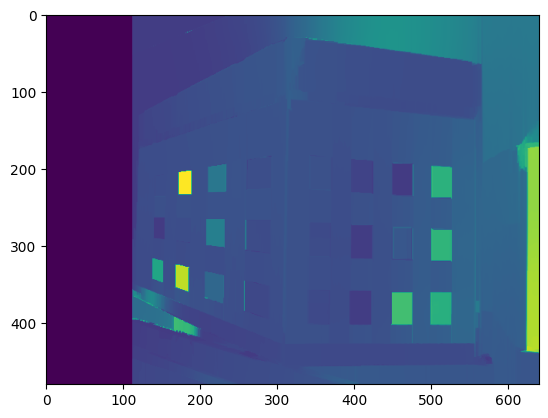

In [19]:
imshow(disparity)

In [20]:
def read_calib_file(fn, height, width):
    ''' Read the calibration file 
        and return the projection matrix Q'''
    # open file
    file = open(fn, 'r')
    # read focal length
    focal_length = np.float32(file.readline()[6: 14: 1])
    # read the baseline
    baseline = np.float32(file.readlines()[2].partition('=')[2].rstrip('\n'))
    Q = np.float32([
                    [1,  0,  0, -0.5 * width],
                    [0, -1,  0, 0.5 * height],
                    [0,  0,  0, -focal_length],
                    [0,  0, -1 / baseline, 0]
                   ])
    return Q

In [ ]:
Q = read_calib_file(calib, height, width)

In [21]:
file = open('calib.txt', 'r')
# read focal length
focal_length = np.float32(file.readline()[6: 14: 1])

ValueError: could not convert string to float: '0 1.5 3.'

In [29]:
file = open('calib.txt', 'r')
file.readline()

'cam0=[4844.97 0 1332.834; 0 4844.97 979.162; 0 0 1]\n'

In [30]:
import math
import cv2
import numpy as np


with open('im1_points.txt', 'r') as f:
    points1 = f.readlines()

with open('im2_points.txt', 'r') as f:
    points2 = f.readlines()

with open('3DCoordinates.txt', 'r') as f:
    points_3d = f.readlines()

points1 = [point.split() for point in points1]  # 2D image points
points2 = [point.split() for point in points2]  # 2D image points
points_3d = [point.split() for point in points_3d]  # 3D world points
im1 = cv2.imread('im1.jpeg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('im2.jpeg', cv2.IMREAD_GRAYSCALE)



In [35]:
points_3d = np.array(points_3d, dtype=np.float32)

In [36]:
points_3d

array([[ 0. ,  1.5,  3.8],
       [ 0. , 22.5,  3.8],
       [ 0. , 22.5, 18.8],
       [ 0. ,  1.5, 18.8],
       [24.3,  0. ,  3.8],
       [ 3.3,  0. ,  3.8],
       [ 3.3,  0. , 18.8],
       [24.3,  0. , 18.8]], dtype=float32)

In [37]:
points1 = np.array(points1, dtype=np.float32)
points2 = np.array(points2, dtype=np.float32)


In [39]:
ret, mtx1, dist, rvecs, tvecs = cv2.calibrateCamera(points_3d, points1, im1.shape[::-1], None, None)

error: OpenCV(4.8.0) /io/opencv/modules/calib3d/src/calibration.cpp:3408: error: (-210:Unsupported format or combination of formats) objectPoints should contain vector of vectors of points of type Point3f in function 'collectCalibrationData'


In [40]:

# 2D image points
image_points = np.array([
    [252, 380],
    [84, 352],
    [92, 202],
    [259, 190],
    [407, 356],
    [294, 379],
    [300, 195],
    [411, 219]
], dtype=np.float32)

# 3D object points
object_points = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
    [24.3, 0, 3.8],
    [3.3, 0, 3.8],
    [3.3, 0, 18.8],
    [24.3, 0, 18.8]
], dtype=np.float32)

# Load one of the stereo images (assuming you have both images)
image = cv2.imread("im1.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set calibration criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([object_points], [image_points], gray_image.shape[::-1], None, None)

print("Camera matrix:")
print(mtx)
print("\nDistortion coefficients:")
print(dist)

error: OpenCV(4.8.0) /io/opencv/modules/calib3d/src/calibration.cpp:1575: error: (-5:Bad argument) For non-planar calibration rigs the initial intrinsic matrix must be specified in function 'cvCalibrateCamera2Internal'


In [41]:
import numpy as np
import cv2

# 2D image points
image_points = np.array([
    [252, 380],
    [84, 352],
    [92, 202],
    [259, 190],
    [407, 356],
    [294, 379],
    [300, 195],
    [411, 219]
], dtype=np.float32)

# 3D object points
object_points = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
    [24.3, 0, 3.8],
    [3.3, 0, 3.8],
    [3.3, 0, 18.8],
    [24.3, 0, 18.8]
], dtype=np.float32)

# Load one of the stereo images (assuming you have both images)
image = cv2.imread("im1.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set calibration criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Initial guess for the camera matrix
initial_camera_matrix = np.array([[500, 0, gray_image.shape[1] / 2],
                                  [0, 500, gray_image.shape[0] / 2],
                                  [0, 0, 1]], dtype=np.float32)

# Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([object_points], [image_points], gray_image.shape[::-1], initial_camera_matrix, None)

print("Camera matrix:")
print(mtx)
print("\nDistortion coefficients:")
print(dist)


error: OpenCV(4.8.0) /io/opencv/modules/calib3d/src/calibration.cpp:1575: error: (-5:Bad argument) For non-planar calibration rigs the initial intrinsic matrix must be specified in function 'cvCalibrateCamera2Internal'


In [42]:
import numpy as np
import cv2

# 2D image points
image_points = np.array([
    [252, 380],
    [84, 352],
    [92, 202],
    [259, 190],
    [407, 356],
    [294, 379],
    [300, 195],
    [411, 219]
], dtype=np.float32)

# 3D object points
object_points = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
    [24.3, 0, 3.8],
    [3.3, 0, 3.8],
    [3.3, 0, 18.8],
    [24.3, 0, 18.8]
], dtype=np.float32)

# Load one of the stereo images (assuming you have both images)
image = cv2.imread("im1.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set calibration criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Initial guess for the camera matrix
initial_camera_matrix = np.array([[500, 0, gray_image.shape[1] / 2],
                                  [0, 500, gray_image.shape[0] / 2],
                                  [0, 0, 1]], dtype=np.float32)

# Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([object_points], [image_points], gray_image.shape[::-1], None, None, flags=cv2.CALIB_USE_INTRINSIC_GUESS)

print("Camera matrix:")
print(mtx)
print("\nDistortion coefficients:")
print(dist)


error: OpenCV(4.8.0) /io/opencv/modules/calib3d/src/calibration.cpp:3500: error: (-5:Bad argument) CALIB_USE_INTRINSIC_GUESS flag is set, but the camera matrix is not 3x3 in function 'prepareCameraMatrix'


In [64]:
import numpy as np
import cv2

# 2D image points
image_points = np.array([
    [252, 380],
    [84, 352],
    [92, 202],
    [259, 190],
    [407, 356],
    [294, 379],
    [300, 195],
    [411, 219]
], dtype=np.float32)

# 3D object points
object_points = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
    [24.3, 0, 3.8],
    [3.3, 0, 3.8],
    [3.3, 0, 18.8],
    [24.3, 0, 18.8]
], dtype=np.float32)

image = cv2.imread("im1.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create initial camera matrix
camera_matrix = np.array([[500, 0, gray_image.shape[1] / 2],
                                 [0, 500, gray_image.shape[0] / 2],
                                 [0, 0, 1]], dtype=np.float32)

# Distortion coefficients (assuming no distortion)
distortion_coeffs = np.zeros((5, 1), dtype=np.float32)

# Calibrate camera
ret, mtx1, distortion_coeffs, rvecs, tvecs = cv2.calibrateCamera([object_points], [image_points], (gray_image.shape[1], gray_image.shape[0]), camera_matrix, distortion_coeffs, flags=cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_FIX_K3)
ret, mtx2, distortion_coeffs, rvecs, tvecs = cv2.calibrateCamera([object_points], [image_points], (gray_image.shape[1], gray_image.shape[0]), camera_matrix, distortion_coeffs, flags=cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_FIX_K3)

print("Camera matrix:")
print(mtx1)
print("\nDistortion coefficients:")
print(distortion_coeffs)


Camera matrix:
[[500.   0. 320.]
 [  0. 500. 240.]
 [  0.   0.   1.]]

Distortion coefficients:
[[-0.83380244]
 [ 0.45170045]
 [ 0.10547262]
 [-0.00704663]
 [ 0.        ]]


In [61]:
import numpy as np
import cv2

# 1st image points
image_points1 = np.array([
    [252, 380],
    [84, 352],
    [92, 202],
    [259, 190],
    [407, 356],
    [294, 379],
    [300, 195],
    [411, 219]
], dtype=np.float32)

# 2nd image points
image_points2 = np.array([
    [258, 405],
    [105, 364],
    [114, 198],
    [268, 178],
    [474, 376],
    [313, 403],
    [322, 183],
    [480, 213]
], dtype=np.float32)

# 3D object points
object_points = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
    [24.3, 0, 3.8],
    [3.3, 0, 3.8],
    [3.3, 0, 18.8],
    [24.3, 0, 18.8]
], dtype=np.float32)

# Define camera intrinsic matrices (initial guess for both cameras)
camera_matrix1_guess = np.array([[500, 0, gray_image.shape[1] / 2],
                                 [0, 500, gray_image.shape[0] / 2],
                                 [0, 0, 1]], dtype=np.float32)
camera_matrix2_guess = camera_matrix1_guess.copy()

# Define distortion coefficients (initial guess for both cameras)
distortion_coeffs_guess = np.zeros((4, 1), dtype=np.float32)

# Calibrate stereo cameras
# ret, camera_matrix1, distortion_coeffs1, camera_matrix2, distortion_coeffs2, R, T, E, F = cv2.stereoCalibrate(
#     [object_points], [image_points1], [image_points2],
#     camera_matrix1_guess, distortion_coeffs_guess,
#     camera_matrix2_guess, distortion_coeffs_guess,
#     gray_image.shape[::-1], flags=cv2.CALIB_FIX_INTRINSIC
# )

ret1, mtx1, dist1, rvecs1, tvecs1 = cv2.calibrateCamera([object_points], image_points1, gray_image.shape[::-1], camera_matrix1_guess, distortion_coeffs_guess, flags=cv2.CALIB_FIX_INTRINSIC)
ret2, mtx2, dist2, rvecs2, tvecs2 = cv2.calibrateCamera([object_points], image_points2, gray_image.shape[::-1], camera_matrix2_guess, distortion_coeffs_guess, flags=cv2.CALIB_FIX_INTRINSIC)


print("Camera matrix 1:")
print(mtx1)
print("\nDistortion coefficients 1:")
print(dist1)

print("\nCamera matrix 2:")
print(mtx2)
print("\nDistortion coefficients 2:")
print(dist2)

print("\nRotation matrix 1:")
print(rvecs1)
print("\nRotation matrix 2:")
print(rvecs2)
print("\nTranslation matrix 1:")
print(tvecs1)
print("\nTranslation matrix 2:")
print(tvecs2)
# print("\nEssential matrix:")
# print(E)
# print("\nFundamental matrix:")
# print(F)


error: OpenCV(4.8.0) /io/opencv/modules/calib3d/src/calibration.cpp:3397: error: (-2:Unspecified error) in function 'void cv::collectCalibrationData(cv::InputArrayOfArrays, cv::InputArrayOfArrays, cv::InputArrayOfArrays, int, cv::Mat&, cv::Mat&, cv::Mat*, cv::Mat&)'
>  (expected: 'nimages == (int)imagePoints1.total()'), where
>     'nimages' is 1
> must be equal to
>     '(int)imagePoints1.total()' is 8


In [58]:
ret

5.614406819399291

In [108]:
import numpy as np
import cv2

# 2D image points
image_points = np.array([
    [252, 380],
    [84, 352],
    [92, 202],
    [259, 190],
    [407, 356],
    [294, 379],
    [300, 195],
    [411, 219]
], dtype=np.float32)

# 3D object points
object_points = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
    [24.3, 0, 3.8],
    [3.3, 0, 3.8],
    [3.3, 0, 18.8],
    [24.3, 0, 18.8]
], dtype=np.float32)

image_points2 = np.array([
    [258, 405],
    [105, 364],
    [114, 198],
    [268, 178],
    [474, 376],
    [313, 403],
    [322, 183],
    [480, 213]
], dtype=np.float32)

image = cv2.imread("im1.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create initial camera matrix
camera_matrix = np.array([[500, 0, gray_image.shape[1] / 2],
                                 [0, 500, gray_image.shape[0] / 2],
                                 [0, 0, 1]], dtype=np.float32)

# Distortion coefficients (assuming no distortion)
distortion_coeffs = np.zeros((5, 1), dtype=np.float32)

# Calibrate camera
ret1, mtx1, distortion_coeffs1, R1, T1 = cv2.calibrateCamera([object_points], [image_points], (gray_image.shape[1], gray_image.shape[0]), camera_matrix, distortion_coeffs, flags=cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_FIX_K3)
ret2, mtx2, distortion_coeffs2, R2, T2 = cv2.calibrateCamera([object_points], [image_points2], (gray_image.shape[1], gray_image.shape[0]), camera_matrix, distortion_coeffs, flags=cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_FIX_K3)

print("Camera matrix 1:")
print(mtx1)
print("Camera matrix 2:")
print(mtx2)
print("\nDistortion coefficients:")
print(distortion_coeffs)

R1_t = cv2.Rodrigues(T1[0])[0]
T1_t = T1[0]
Rt_1 = np.concatenate([R1_t,T1_t], axis=-1) # [R|t]
P1 = np.matmul(mtx1,Rt_1) # A[R|t]

R2_t = cv2.Rodrigues(T2[0])[0]
T2_t = T2[0]
Rt_2 = np.concatenate([R2_t,T2_t], axis=-1) # [R|t]
P2 = np.matmul(mtx2,Rt_2) # A[R|t]

img1 = cv2.imread('im1.jpeg', 0)
img2 = cv2.imread('im2.jpeg', 0)


keypoints1, descriptors1 = cv2.SIFT_create().detectAndCompute(img1, None)
keypoints2, descriptors2 = cv2.SIFT_create().detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

points1 = np.float32([keypoints1[match.queryIdx].pt for match in matches])
points2 = np.float32([keypoints2[match.trainIdx].pt for match in matches])

# Perform triangulation
points_3d_homogeneous = cv2.triangulatePoints(P1, P2, np.array([256, 451]), np.array([256, 451]))

# Convert homogeneous coordinates to 3D Cartesian coordinates
points_3d_cartesian = cv2.convertPointsFromHomogeneous(points_3d_homogeneous.T)

# Extract the 3D coordinates
x_3d = points_3d_cartesian[0, 0, 0]
y_3d = points_3d_cartesian[0, 0, 1]
z_3d = points_3d_cartesian[0, 0, 2]
6
print("3D Coordinates (X, Y, Z):")
print(x_3d, y_3d, z_3d)



Camera matrix 1:
[[650.44696635   0.         281.64483807]
 [  0.         636.26293457 205.84729924]
 [  0.           0.           1.        ]]
Camera matrix 2:
[[709.8899907    0.         306.12094705]
 [  0.         657.65720807  69.98342609]
 [  0.           0.           1.        ]]

Distortion coefficients:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
3D Coordinates (X, Y, Z):
-9.38532 -5.1391873 -1.3808758


In [87]:
ret1, mtx1, distortion_coeffs1, R1, T1 = cv2.calibrateCamera([object_points], [image_points], (gray_image.shape[1], gray_image.shape[0]), camera_matrix, distortion_coeffs, flags=cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_FIX_K3)
ret2, mtx2, distortion_coeffs2, R2, T2 = cv2.calibrateCamera([object_points], [image_points2], (gray_image.shape[1], gray_image.shape[0]), camera_matrix, distortion_coeffs, flags=cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_FIX_K3)

In [97]:
print(mtx1.shape), 
print(R1[0].shape)
print(T1[0].shape)

(3, 3)
(3, 1)
(3, 1)


In [98]:
R1_t = cv2.Rodrigues(T1[0])[0]
T1_t = T1[0]
Rt = np.concatenate([R1_t,T1_t], axis=-1) # [R|t]
P = np.matmul(mtx1,Rt) # A[R|t]

In [100]:
P.shape

(3, 4)

In [86]:
proj_matrix1 = np.dot(mtx1, np.hstack((R1, T1)))
proj_matrix2 = np.dot(mtx1, np.hstack((R2, T2)))

ValueError: shapes (3,3) and (1,6,1) not aligned: 3 (dim 1) != 6 (dim 1)

In [63]:
import numpy as np
import cv2

# 2D image points
image_points = np.array([
    [252, 380],
    [84, 352],
    [92, 202],
    [259, 190],
    [407, 356],
    [294, 379],
    [300, 195],
    [411, 219]
], dtype=np.float32)

# 3D object points
object_points = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
    [24.3, 0, 3.8],
    [3.3, 0, 3.8],
    [3.3, 0, 18.8],
    [24.3, 0, 18.8]
], dtype=np.float32)

# Load one of the stereo images (assuming you have both images)
image = cv2.imread("im1.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define camera intrinsic matrix (initial guess)
camera_matrix_guess = np.array([[500, 0, gray_image.shape[1] / 2],
                                 [0, 500, gray_image.shape[0] / 2],
                                 [0, 0, 1]], dtype=np.float32)

# Define distortion coefficients (initial guess)
distortion_coeffs_guess = np.zeros((4, 1), dtype=np.float32)

# Calibrate camera
ret, camera_matrix, distortion_coeffs, rvecs, tvecs = cv2.calibrateCamera([object_points], [image_points], gray_image.shape[::-1], camera_matrix_guess, distortion_coeffs_guess)

print("Camera matrix:")
print(camera_matrix)
print("\nDistortion coefficients:")
print(distortion_coeffs)


error: OpenCV(4.8.0) /io/opencv/modules/calib3d/src/calibration.cpp:1575: error: (-5:Bad argument) For non-planar calibration rigs the initial intrinsic matrix must be specified in function 'cvCalibrateCamera2Internal'


In [84]:
np.hstack((R1, T1)).shape

(1, 6, 1)

In [ ]:
import numpy as N
def DLTrecon(nd, nc, Ls, uvs):
    '''
    Reconstruction of object point from image point(s) based on the DLT parameters.

    This code performs 2D or 3D DLT point reconstruction with any number of views (cameras).
    For 3D DLT, at least two views (cameras) are necessary.
    Inputs:
     nd is the number of dimensions of the object space: 3 for 3D DLT and 2 for 2D DLT.
     nc is the number of cameras (views) used.
     Ls (array type) are the camera calibration parameters of each camera 
      (is the output of DLTcalib function). The Ls parameters are given as columns
      and the Ls for different cameras as rows.
     uvs are the coordinates of the point in the image 2D space of each camera.
      The coordinates of the point are given as columns and the different views as rows.
    Outputs:
     xyz: point coordinates in space
    '''
    
    #Convert Ls to array:
    Ls = N.asarray(Ls) 
    #Check the parameters:
    if Ls.ndim ==1 and nc != 1:
        raise ValueError('Number of views (%d) and number of sets of camera calibration parameters (1) are different.' %(nc))    
    if Ls.ndim > 1 and nc != Ls.shape[0]:
        raise ValueError('Number of views (%d) and number of sets of camera calibration parameters (%d) are different.' %(nc, Ls.shape[0]))
    if nd == 3 and Ls.ndim == 1:
        raise ValueError('At least two sets of camera calibration parameters are needed for 3D point reconstruction.')

    if nc == 1: #2D and 1 camera (view), the simplest (and fastest) case
        #One could calculate inv(H) and input that to the code to speed up things if needed.
        #(If there is only 1 camera, this transformation is all Floatcanvas2 might need)
        Hinv = N.linalg.inv( Ls.reshape(3,3) )
        #Point coordinates in space:
        xyz = N.dot( Hinv,[uvs[0],uvs[1],1] ) 
        xyz = xyz[0:2]/xyz[2]       
    else:
        M = []
        for i in range(nc):
            L = Ls[i,:]
            u,v = uvs[i][0], uvs[i][1] #this indexing works for both list and numpy array
            if nd == 2:      
                M.append( [L[0]-u*L[6], L[1]-u*L[7], L[2]-u*L[8]] )
                M.append( [L[3]-v*L[6], L[4]-v*L[7], L[5]-v*L[8]] )
            elif nd == 3:  
                M.append( [L[0]-u*L[8], L[1]-u*L[9], L[2]-u*L[10], L[3]-u*L[11]] )
                M.append( [L[4]-v*L[8], L[5]-v*L[9], L[6]-v*L[10], L[7]-v*L[11]] )
        
        #Find the xyz coordinates:
        U, S, Vh = N.linalg.svd(N.asarray(M))
        #Point coordinates in space:
        xyz = Vh[-1,0:-1] / Vh[-1,-1]
    
    return xyz



def DLTcalib(nd, xyz, uv):
    '''
    Camera calibration by DLT using known object points and their image points.

    This code performs 2D or 3D DLT camera calibration with any number of views (cameras).
    For 3D DLT, at least two views (cameras) are necessary.
    Inputs:
     nd is the number of dimensions of the object space: 3 for 3D DLT and 2 for 2D DLT.
     xyz are the coordinates in the object 3D or 2D space of the calibration points.
     uv are the coordinates in the image 2D space of these calibration points.
     The coordinates (x,y,z and u,v) are given as columns and the different points as rows.
     For the 2D DLT (object planar space), only the first 2 columns (x and y) are used.
     There must be at least 6 calibration points for the 3D DLT and 4 for the 2D DLT.
    Outputs:
     L: array of the 8 or 11 parameters of the calibration matrix
     err: error of the DLT (mean residual of the DLT transformation in units of camera coordinates).
    '''
    
    #Convert all variables to numpy array:
    xyz = N.asarray(xyz)
    uv = N.asarray(uv)
    #number of points:
    np = xyz.shape[0]
    #Check the parameters:
    if uv.shape[0] != np:
        raise ValueError('xyz (%d points) and uv (%d points) have different number of points.' %(np, uv.shape[0]))
    if (nd == 2 and xyz.shape[1] != 2) or (nd == 3 and xyz.shape[1] != 3):
        raise ValueError('Incorrect number of coordinates (%d) for %dD DLT (it should be %d).' %(xyz.shape[1],nd,nd))
    if nd == 3 and np < 6 or nd == 2 and np < 4:
        raise ValueError('%dD DLT requires at least %d calibration points. Only %d points were entered.' %(nd, 2*nd, np))
        
    #Normalize the data to improve the DLT quality (DLT is dependent of the system of coordinates).
    #This is relevant when there is a considerable perspective distortion.
    #Normalization: mean position at origin and mean distance equals to 1 at each direction.
    Txyz, xyzn = Normalization(nd, xyz)
    Tuv, uvn = Normalization(2, uv)

    A = []
    if nd == 2: #2D DLT
        for i in range(np):
            x,y = xyzn[i,0], xyzn[i,1]
            u,v = uvn[i,0], uvn[i,1]
            A.append( [x, y, 1, 0, 0, 0, -u*x, -u*y, -u] )
            A.append( [0, 0, 0, x, y, 1, -v*x, -v*y, -v] )
    elif nd == 3: #3D DLT
        for i in range(np):
            x,y,z = xyzn[i,0], xyzn[i,1], xyzn[i,2]
            u,v = uvn[i,0], uvn[i,1]
            A.append( [x, y, z, 1, 0, 0, 0, 0, -u*x, -u*y, -u*z, -u] )
            A.append( [0, 0, 0, 0, x, y, z, 1, -v*x, -v*y, -v*z, -v] )

    #convert A to array
    A = N.asarray(A) 
    #Find the 11 (or 8 for 2D DLT) parameters:
    U, S, Vh = N.linalg.svd(A)
    #The parameters are in the last line of Vh and normalize them:
    L = Vh[-1,:] / Vh[-1,-1]
    #Camera projection matrix:
    H = L.reshape(3,nd+1)
    #Denormalization:
    H = N.dot( N.dot( N.linalg.pinv(Tuv), H ), Txyz );
    H = H / H[-1,-1]
    L = H.flatten(0)
    #Mean error of the DLT (mean residual of the DLT transformation in units of camera coordinates):
    uv2 = N.dot( H, N.concatenate( (xyz.T, N.ones((1,xyz.shape[0]))) ) ) 
    uv2 = uv2/uv2[2,:] 
    #mean distance:
    err = N.sqrt( N.mean(N.sum( (uv2[0:2,:].T - uv)**2,1 )) ) 

    return L, err


def Normalization(nd,x):
    '''
    Normalization of coordinates (centroid to the origin and mean distance of sqrt(2 or 3).

    Inputs:
     nd: number of dimensions (2 for 2D; 3 for 3D)
     x: the data to be normalized (directions at different columns and points at rows)
    Outputs:
     Tr: the transformation matrix (translation plus scaling)
     x: the transformed data
    '''

    x = N.asarray(x)
    m, s = N.mean(x,0), N.std(x)
    if nd==2:
        Tr = N.array([[s, 0, m[0]], [0, s, m[1]], [0, 0, 1]])
    else:
        Tr = N.array([[s, 0, 0, m[0]], [0, s, 0, m[1]], [0, 0, s, m[2]], [0, 0, 0, 1]])
        
    Tr = N.linalg.inv(Tr)
    x = N.dot( Tr, N.concatenate( (x.T, N.ones((1,x.shape[0]))) ) )
    x = x[0:nd,:].T

    return Tr, x


def test():
    #Tests of DLTx 
    print('')
    print('Test of camera calibration and point reconstruction based on direct linear transformation (DLT).')
    print('3D (x, y, z) coordinates (in cm) of the corner of a cube (the measurement error is at least 0.2 cm):')
    xyz = [[0,0,0], [0,12.3,0], [14.5,12.3,0], [14.5,0,0], [0,0,14.5], [0,12.3,14.5], [14.5,12.3,14.5], [14.5,0,14.5]]
    print(N.asarray(xyz))
    print('2D (u, v) coordinates (in pixels) of 4 different views of the cube:')
    uv1 = [[1302,1147],[1110,976],[1411,863],[1618,1012],[1324,812],[1127,658],[1433,564],[1645,704]]
    uv2 = [[1094,1187],[1130,956],[1514,968],[1532,1187],[1076,854],[1109,647],[1514,659],[1523,860]]
    # uv3 = [[1073,866],[1319,761],[1580,896],[1352,1016],[1064,545],[1304,449],[1568,557],[1313,668]]
    # uv4 = [[1205,1511],[1193,1142],[1601,1121],[1631,1487],[1157,1550],[1139,1124],[1628,1100],[1661,1520]]
    print('uv1:')
    print(N.asarray(uv1))
    print('uv2:')
    print(N.asarray(uv2))

    print('')
    print('Use 4 views to perform a 3D calibration of the camera with 8 points of the cube:')
    nd=3
    nc=4
    L1, err1 = DLTcalib(nd, xyz, uv1)
    print('Camera calibration parameters based on view #1:')
    print(L1)
    print('Error of the calibration of view #1 (in pixels):')
    print(err1)
    L2, err2 = DLTcalib(nd, xyz, uv2)
    print('Camera calibration parameters based on view #2:')
    print(L2)
    print('Error of the calibration of view #2 (in pixels):')
    print(err2)
    xyz1234 = N.zeros((len(xyz),3))
    L1234 = [L1,L2]
    for i in range(len(uv1)):
        xyz1234[i,:] = DLTrecon( nd, nc, L1234, [uv1[i],uv2[i]] )
    print('Reconstruction of the same 8 points based on 4 views and the camera calibration parameters:')
    print(xyz1234)
    print('Mean error of the point reconstruction using the DLT (error in cm):')
    print(N.mean(N.sqrt(N.sum((N.array(xyz1234)-N.array(xyz))**2,1))))

    print('')
    print('Test of the 2D DLT')
    print('2D (x, y) coordinates (in cm) of the corner of a square (the measurement error is at least 0.2 cm):')
    xy = [[0,0], [0,12.3], [14.5,12.3], [14.5,0]]
    print(N.asarray(xy))
    print('2D (u, v) coordinates (in pixels) of 2 different views of the square:')
    uv1 = [[1302,1147],[1110,976],[1411,863],[1618,1012]]
    uv2 = [[1094,1187],[1130,956],[1514,968],[1532,1187]]
    print('uv1:')
    print(N.asarray(uv1))
    print('uv2:')
    print(N.asarray(uv2))
    print('')
    print('Use 2 views to perform a 2D calibration of the camera with 4 points of the square:')
    nd=2
    nc=2
    L1, err1 = DLTcalib(nd, xy, uv1)
    print('Camera calibration parameters based on view #1:')
    print(L1)
    print('Error of the calibration of view #1 (in pixels):')
    print(err1)
    L2, err2 = DLTcalib(nd, xy, uv2)
    print('Camera calibration parameters based on view #2:')
    print(L2)
    print('Error of the calibration of view #2 (in pixels):')
    print(err2)
    xy12 = N.zeros((len(xy),2))
    L12 = [L1,L2]
    for i in range(len(uv1)):
        xy12[i,:] = DLTrecon( nd, nc, L12, [uv1[i],uv2[i]] )
    print('Reconstruction of the same 4 points based on 2 views and the camera calibration parameters:')
    print(xy12)
    print('Mean error of the point reconstruction using the DLT (error in cm):')
    print(N.mean(N.sqrt(N.sum((N.array(xy12)-N.array(xy))**2,1))))

    print('')
    print('Use only one view to perform a 2D calibration of the camera with 4 points of the square:')
    nd=2
    nc=1
    L1, err1 = DLTcalib(nd, xy, uv1)
    print('Camera calibration parameters based on view #1:')
    print(L1)
    print('Error of the calibration of view #1 (in pixels):')
    print(err1)
    xy1 = N.zeros((len(xy),2))
    for i in range(len(uv1)):
        xy1[i,:] = DLTrecon( nd, nc, L1, uv1[i] )
    print('Reconstruction of the same 4 points based on one view and the camera calibration parameters:')
    print(xy1)
    print('Mean error of the point reconstruction using the DLT (error in cm):')
    print(N.mean(N.sqrt(N.sum((N.array(xy1)-N.array(xy))**2,1))))

#test()

In [120]:
import numpy as np

def camera_calibration1(image_points, world_points):
    # Ensure the inputs are numpy arrays
    # image_points = np.array(image_points)
    # world_points = np.array(world_points)

    # Initialize the matrix A
    A = np.zeros((len(image_points) * 2, 12))
    
    # Fill the matrix A using image and world points
    for i, (image, object) in enumerate(zip(image_points, world_points)):
        X, Y, Z = object
        x, y = image
        A[2 * i, :] = [-X, -Y, -Z, -1, 0, 0, 0, 0, x * X, x * Y, x * Z, x]
        A[2 * i + 1, :] = [0, 0, 0, 0, -X, -Y, -Z, -1, y * X, y * Y, y * Z, y]

    # Perform SVD decomposition
    _, _, V = np.linalg.svd(A)
    
    # Get the last row of V and reshape it into a 3x4 matrix to get the projection matrix P
    P1 = V[-1].reshape((3, 4))

    # Compute the calibration error (reprojection error)
    projection_error = 0.0
    for image, object in zip(image_points, world_points):
        X = np.array(list(object) + [1])
        x = np.array(list(image) + [1])
        projected_x = np.dot(P, X)
        projected_x /= projected_x[-1]  # Normalizing
        projection_error += np.linalg.norm(projected_x[:-1] - x[:-1])

    mean_error = projection_error / len(image_points)
    print("Mean reprojection error: {}".format(mean_error))
    print(f"Projection Matrix: \n{P}")
    
    return P


def camera_calibration(image_points, world_points):
    num_points = len(image_points)
    A = np.zeros((2 * num_points, 12))

    for i, (img_pt, obj_pt) in enumerate(zip(image_points, world_points)):
        x, y, z = obj_pt
        u, v = img_pt

        A[2 * i] = [-x, -y, -z, -1, 0, 0, 0, 0, u * x, u * y, u * z, u]
        A[2 * i + 1] = [0, 0, 0, 0, -x, -y, -z, -1, v * x, v * y, v * z, v]

    _, _, V = np.linalg.svd(A)
    P = V[-1].reshape((3, 4))
    P /= P[-1, -1]  # Normalize

    return P

# 2D image points
image_points = np.array([
    [252, 380],
    [84, 352],
    [92, 202],
    [259, 190],
    [407, 356],
    [294, 379],
    [300, 195],
    [411, 219]
], dtype=np.float32)

# 3D object points
object_points = np.array([
    [0, 1.5, 3.8],
    [0, 22.5, 3.8],
    [0, 22.5, 18.8],
    [0, 1.5, 18.8],
    [24.3, 0, 3.8],
    [3.3, 0, 3.8],
    [3.3, 0, 18.8],
    [24.3, 0, 18.8]
], dtype=np.float32)

image_points2 = np.array([
    [258, 405],
    [105, 364],
    [114, 198],
    [268, 178],
    [474, 376],
    [313, 403],
    [322, 183],
    [480, 213]
], dtype=np.float32)

P1 = camera_calibration(image_points, object_points)
P2 = camera_calibration(image_points2, object_points)

import numpy as np

def DLT(P1, P2, p1, p2):
    A = np.zeros((4, 4))
    A[0] = p1[0] * P1[2, :] - P1[0, :]
    A[1] = p1[1] * P1[2, :] - P1[1, :]
    A[2] = p2[0] * P2[2, :] - P2[0, :]
    A[3] = p2[1] * P2[2, :] - P2[1, :]

    _, _, V = np.linalg.svd(A)
    X = V[-1]
    X /= X[3]
    print(f"DLT -> {X}")
    return X



def find_best_match(src_point, F, img1, img2, window_size=5):
    src_point = np.array([src_point], dtype=np.float32)
    line = cv2.computeCorrespondEpilines(src_point, 1, F)[0].ravel()
    
    height, width = img2.shape
    
    best_score = -1
    best_point = None
    for x in range(width):
        y = int(-(line[2] + line[0] * x) / line[1])
        if 0 <= y < height:
            y_int = int(src_point[0][1])
            x_int = int(src_point[0][0])

            window_centered_at_p = img1[y_int-window_size:y_int+window_size+1, 
                            x_int-window_size:x_int+window_size+1]
            window_centered_at_q = img2[y-window_size:y+window_size+1, x-window_size:x+window_size+1]
            
            if window_centered_at_p.shape == window_centered_at_q.shape:
                score = zncc(window_centered_at_p, window_centered_at_q)
                if score > best_score:
                    best_score = score
                    best_point = (x, y)
    
    return best_point

def zncc(window1, window2):
    mean1 = np.mean(window1)
    mean2 = np.mean(window2)
    
    numerator = np.sum((window1 - mean1) * (window2 - mean2))
    denominator = np.sqrt(np.sum((window1 - mean1) ** 2) * np.sum((window2 - mean2) ** 2))
    
    if denominator == 0:
        return 0
    return numerator / denominator

def on_mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        F, img1, img2, points1, points2 = param
        
        dst_point = find_best_match((x, y), F, img1, img2)
        cv2.drawMarker(img1, (x, y), (255, 255, 59), markerType=cv2.MARKER_CROSS, markerSize=10, thickness=2)
        cv2.drawMarker(img2, dst_point, (255, 255, 59), markerType=cv2.MARKER_CROSS, markerSize=10, thickness=2)

        # cv2.circle(img1, (x, y), 5, (0, 255, 0), -1)
        # cv2.circle(img2, dst_point, 5, (0, 0, 255), -1)

        # Draw the epipolar line on the right image
        line = cv2.computeCorrespondEpilines(np.array([[x, y]]).reshape(-1, 1, 2), 1, F).reshape(-1,)
        color = (255, 0, 0)  # Blue color for the epipolar line
        x0, y0 = map(int, [0, -line[2] / line[1]])
        x1, y1 = map(int, [img2.shape[1], -(line[2] + line[0] * img2.shape[1]) / line[1]])
        cv2.line(img2, (x0, y0), (x1, y1), color, 1)
        print(f"The x` y` is -> {dst_point}")
        print(f"DLT init with {P1} {P2} {(x, y)} {dst_point}")
        print(DLT(P1, P2, (x,y), dst_point))
        cv2.imshow('Image1', img1)
        cv2.imshow('Image2', img2)


img1 = cv2.imread('im1.jpeg', 0)
img2 = cv2.imread('im2.jpeg', 0)


keypoints1, descriptors1 = cv2.SIFT_create().detectAndCompute(img1, None)
keypoints2, descriptors2 = cv2.SIFT_create().detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

points1 = np.float32([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_LMEDS)


cv2.namedWindow('Image1')
cv2.setMouseCallback('Image1', on_mouse_click, [F, img1, img2, points1, points2])

cv2.imshow('Image1', img1)
cv2.imshow('Image2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

The x` y` is -> (276, 462)
DLT init with [[ 1.28673583e+01 -7.08022740e+00  7.63836385e-01  2.65973053e+02]
 [ 5.08216216e+00  3.26684766e+00 -1.28100321e+01  4.33572278e+02]
 [ 1.74581891e-02  1.32772730e-02  1.01479673e-03  1.00000000e+00]] [[ 1.68842575e+01 -5.62662744e+00  9.04067042e-01  2.71937127e+02]
 [ 5.45493675e+00  4.64392705e+00 -1.54990574e+01  4.69532175e+02]
 [ 1.82295905e-02  1.83503709e-02  7.30324632e-04  1.00000000e+00]] (269, 428) (276, 462)
DLT -> [ 0.31604726 -0.01208074  0.39756499  1.        ]
[ 0.31604726 -0.01208074  0.39756499  1.        ]
The x` y` is -> (504, 159)
DLT init with [[ 1.28673583e+01 -7.08022740e+00  7.63836385e-01  2.65973053e+02]
 [ 5.08216216e+00  3.26684766e+00 -1.28100321e+01  4.33572278e+02]
 [ 1.74581891e-02  1.32772730e-02  1.01479673e-03  1.00000000e+00]] [[ 1.68842575e+01 -5.62662744e+00  9.04067042e-01  2.71937127e+02]
 [ 5.45493675e+00  4.64392705e+00 -1.54990574e+01  4.69532175e+02]
 [ 1.82295905e-02  1.83503709e-02  7.30324632e-04